In [1]:
#Initialization
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
#import Levenshtein

In [2]:
#Loading conversion table for peptide description
#Positionwise carbon
df=pd.read_excel("aa_properties.xlsx")
# H-wise Carbon 
#df=pd.read_excel("aa_properties2.xlsx")
# identity
#df=pd.read_excel("aa_properties3.xlsx")
df

,aa,CA-Gly,Pro-MC,CB,CB-Pro,Carboxyl,Amide,His,Trp,Phe-Tyr,OH-Tyr,CG,CD,CE,OH,SH,S,NH3,Arg,MC
0,A,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
1,C,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4
2,D,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,E,0,0,1,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,4
4,F,0,0,1,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,4
5,G,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
6,H,0,0,1,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,4
7,I,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,4
8,K,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0,4
9,L,0,0,1,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,4


In [3]:
# Function for converting a peptide to atom composition
def peptrans(peptide):
    rows=[]
    for l in peptide:
        rows.append(df[df.aa==l])
    return pd.concat(rows).sum()


In [4]:
# Reading in the peptide microarray data
pf=pd.read_excel("../Clean_results_2_2019.xlsx")

/home/gergely/anaconda3/lib/python3.7/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():
/home/gergely/anaconda3/lib/python3.7/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Conditional Formatting extension is not supported and will be removed
  for idx, row in parser.parse():


In [5]:
# applying the function to all peptides in the experimental data
transpf=pf['Peptide'].apply(peptrans)

In [6]:
# Merging the original table with fluorescence values with the atom composition
mergepf = pd.concat([pf, transpf], axis=1, sort=False)

In [7]:
# Renaming and new columns for convenience
mergepf["Prot_pep"] = mergepf["Protein"].map(str) +"_"+ mergepf["Peptide"]
mergepf["Prot_res_pep"] = mergepf["Protein"].map(str) +"_"+ mergepf["Residue number"].map(str)+"_"+ mergepf["Peptide"]
mergepf=mergepf.set_index('Prot_res_pep')
mergepf=mergepf.rename(columns={u'Survivin, 1 µg/ml': u'Fluorescence'})

In [8]:
# Removing peptides with Cys at the C terminus, because of binding artifacts
i=0
LastClst=[]
for idx,pept in mergepf.iterrows():
    if pept['Peptide'][-1]=='C':
        print (pept['Peptide'], pept['Fluorescence'])
        i=i+1
        LastClst.append(True)
    else:
        LastClst.append(False)
print (i)
mergepf['LastC']=LastClst

VKSYLYQILQGIVFC 2169.5
HPSLGHQVSYLPRMC 205.5
EQNSVTLEVLLVKVC 742.0
EARDDLHCPWCTLNC 1388.5
SRGIIRIINPITMQC 209.5
VKDVLFIRPRKYIHC 1022.5
FWLQELNEDLAEMGC 4460.0
CRSPDSEEGNDMVFC 3059.0
SWLCRSCVLGIYPQC 768.0
HVSCALWIPEVSIAC 369.5
SHIPPSRWALVCNLC 817.5
VCNLCKLKTGACIQC 373.0
KLKTGACIQCSIKSC 394.0
AKESSPAWRTPSSEC 937.5
WLSRSVTSFFRYRQC 1154.0
GGTTAPGPIHLLELC 1730.0
KKTAEEPAASGRIIC 889.0
KKHGSGSGSGAKERC 990.0
AQNQEICSSGQHNAC 399.5
VQREQSLHSFHTLFC 1854.5
PCDHPRQPCDSSCPC 297.0
ECQNRFPGCRCKAQC 324.0
FPGCRCKAQCNTKQC 0.0
TCGAADHWDSKNVSC 682.0
GMCRVIPPPDWRPEC 1590.5
EIEQEYWRLVEEKDC 9311.5
KPRKWLQLETSERRC 1337.0
MVVQENENVVFCLEC 5712.5
LRFQSSAVMALQEAC 587.5
YAPRGELYKELQKSC 1054.0
GILKVPEGSWLCRTC 568.0
TKVSHIPSSRWALVC 1069.5
TILAENDEVKFKSYC 1362.0
TYMVTRREKIKRSVC 1597.0
KGERQQQGEAHDGAC 1405.5
AGAGRPGLPQGRHLC 1141.0
KFEGAVVCVALIFAC 2024.5
VGLLLMQMPEEEAFC 4181.0
LRELFKPSMAELGLC 1370.5
TDEAVSGWKFEIHRC 907.0
FPLLELLAMALNPHC 106.0
NVQIIAALIKPFGQC 1100.5
DKWVIPALKQIREIC 1526.0
KQIWKCLAENAVYLC 2108.0
CLAENAVYLC

In [9]:
# This is where the training takes place
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#clf = svm.SVC(gamma=0.001)
#clf = RandomForestClassifier(max_depth=None, n_estimators=100, max_features='auto')
#clf = MLPClassifier(solver='lbfgs',random_state=1, max_iter=10000)
clf = MLPClassifier(hidden_layer_sizes=(2,), random_state=1, max_iter=10000)
#clf = GaussianProcessClassifier(1.0 * RBF(1.0))
#clf = DecisionTreeClassifier(max_depth=5)
#clf = KNeighborsClassifier(5)
#clf = AdaBoostClassifier()

Y=np.array(mergepf[mergepf['LastC']==False][u'Fluorescence']>0)
X = np.array(mergepf[(mergepf[u'LastC']==False)][
    [u'CA-Gly', u'Pro-MC', u'CB', u'CB-Pro',
        u'Carboxyl', u'Amide',
        u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CG', u'CD', u'CE',
        u'OH', u'SH', u'S', u'NH3', u'Arg',u'MC']])



#X = np.array(mergepf[[u'CA-Gly', u'Pro-MC', 
#         u'Carboxyl', u'Amide',
#         u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CH2', u'CH', u'CH3',
#         u'OH', u'SH', u'S', u'NH3', u'Arg', u'MC']])[1::3]
#         u'OH', u'SH', u'S', u'NH3', u'Arg', u'MC']])

#Y=np.array(mergepf[u'Fluorescence']>0)
#Y=np.array(mergepf[u'Fluorescence']>0)[1::3]

#Y=np.array(mergepf[mergepf['LastC']==False][u'Fluorescence']>0)
#X = np.array(mergepf[(mergepf[u'LastC']==False)][[u'CA-Gly', u'Pro-MC', 
#         u'Carboxyl', u'Amide',
#         u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CH2', u'CH', u'CH3',
#         u'OH', u'SH', u'S', u'NH3', u'Arg', u'MC']])


#X = np.array(mergepf[(mergepf[1::3][u'Fluorescence']>100)|(mergepf[u'Fluorescence']==0)][[u'CA-Gly', u'Pro-MC', 
#         u'Carboxyl', u'Amide',
#         u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CH2', u'CH', u'CH3',
#         u'OH', u'SH', u'S', u'NH3', u'Arg', u'MC']])

#X = np.array(mergepf[(mergepf[u'Fluorescence']>100)|(mergepf[u'Fluorescence']==0)][[u'CA-Gly', u'Pro-MC', 
#         u'Carboxyl', u'Amide',
#         u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CH2', u'CH', u'CH3',
#         u'OH', u'SH', u'S', u'NH3', u'Arg', u'MC']])


#X= np.array(mergepf[[u'A', u'C', u'D', u'E', u'F',
#       u'G', u'H', u'I', u'K', u'L',
#       u'M', u'N', u'P', u'Q', u'R', u'S', u'T',
#       u'Y', u'W', u'V']])
sc=StandardScaler()

#X = MinMaxScaler().fit_transform(X,Y)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.1, shuffle=True)

X_train= sc.fit_transform(X_train)
X_test= sc.transform (X_test)


#    X, np.array(mergepf[(mergepf[u'Fluorescence']>100)|(mergepf[u'Fluorescence']==0)][u'Fluorescence']>100), test_size=0.5, shuffle=True)
#    X, np.array(mergepf[1::3][(mergepf[u'Fluorescence']>100)|(mergepf[u'Fluorescence']==0)][u'Fluorescence']>100), test_size=0.5, shuffle=True)
clf.fit(X_train, y_train)
predict=clf.predict(X_test)
predict

array([ True, False, False, False, False, False, False, False,  True,
       False,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False,  True, False, False, False,  True, False,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False, False, False, False,
        True,  True, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True, False,  True,  True, False,  True,  True,
       False,  True, False, False, False, False,  True, False, False,
       False, False,

Confusion matrix:
[[323  29]
 [ 56 121]]


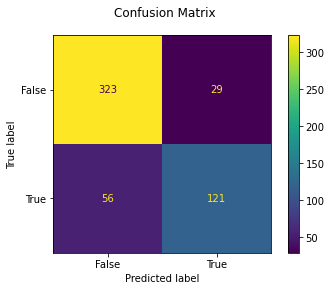

In [10]:
# Optional to run, to evaluate the prediction strength
disp = metrics.ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [11]:
# Optional to run, to evaluate the prediction strength
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predict)}\n")

Classification report for classifier MLPClassifier(hidden_layer_sizes=(2,), max_iter=10000, random_state=1):
              precision    recall  f1-score   support

       False       0.85      0.92      0.88       352
        True       0.81      0.68      0.74       177

    accuracy                           0.84       529
   macro avg       0.83      0.80      0.81       529
weighted avg       0.84      0.84      0.84       529




In [12]:
import requests

def get_uniprot_sequence(entry_id):
    url = f"https://www.uniprot.org/uniprot/{entry_id}.fasta"
    response = requests.get(url)
    
    if response.status_code == 200:
        # Extract the sequence from the response content
        lines = response.text.strip().split("\n")
        sequence = ''.join(lines[1:])  # Exclude the header line starting with ">"
        return sequence
    else:
        print(f"Failed to retrieve UniProt entry: {response.status_code}")

# Example usage, do not worry about it, the function above will be called later
entry_id = "P51532"  # Replace with your UniProt entry ID
sequence = get_uniprot_sequence(entry_id)
print(f"Sequence for UniProt entry {entry_id}:")
print(sequence)

Sequence for UniProt entry P51532:
MSTPDPPLGGTPRPGPSPGPGPSPGAMLGPSPGPSPGSAHSMMGPSPGPPSAGHPIPTQGPGGYPQDNMHQMHKPMESMHEKGMSDDPRYNQMKGMGMRSGGHAGMGPPPSPMDQHSQGYPSPLGGSEHASSPVPASGPSSGPQMSSGPGGAPLDGADPQALGQQNRGPTPFNQNQLHQLRAQIMAYKMLARGQPLPDHLQMAVQGKRPMPGMQQQMPTLPPPSVSATGPGPGPGPGPGPGPGPAPPNYSRPHGMGGPNMPPPGPSGVPPGMPGQPPGGPPKPWPEGPMANAAAPTSTPQKLIPPQPTGRPSPAPPAVPPAASPVMPPQTQSPGQPAQPAPMVPLHQKQSRITPIQKPRGLDPVEILQEREYRLQARIAHRIQELENLPGSLAGDLRTKATIELKALRLLNFQRQLRQEVVVCMRRDTALETALNAKAYKRSKRQSLREARITEKLEKQQKIEQERKRRQKHQEYLNSILQHAKDFKEYHRSVTGKIQKLTKAVATYHANTEREQKKENERIEKERMRRLMAEDEEGYRKLIDQKKDKRLAYLLQQTDEYVANLTELVRQHKAAQVAKEKKKKKKKKKAENAEGQTPAIGPDGEPLDETSQMSDLPVKVIHVESGKILTGTDAPKAGQLEAWLEMNPGYEVAPRSDSEESGSEEEEEEEEEEQPQAAQPPTLPVEEKKKIPDPDSDDVSEVDARHIIENAKQDVDDEYGVSQALARGLQSYYAVAHAVTERVDKQSALMVNGVLKQYQIKGLEWLVSLYNNNLNGILADEMGLGKTIQTIALITYLMEHKRINGPFLIIVPLSTLSNWAYEFDKWAPSVVKVSYKGSPAARRAFVPQLRSGKFNVLLTTYEYIIKDKHILAKIRWKYMIVDEGHRMKNHHCKLTQVLNTHYVAPRRLLLTGTPLQNKLPELWALLNFLLPTIFKSCSTFEQWFNAPFAMTGEKVDLNEEETILII

In [13]:
import requests
import re

def get_uniprot_entries(pdb_id):
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    response = requests.get(url)
    pdb_data = response.text
    
    uniprot_entries = []
    
    for line in pdb_data.split('\n'):
        if line.startswith('DBREF') and 'UNP' in line:
            match = re.search(r'UNP\s+(\w+)', line)
            if match:
                uniprot_entry = match.group(1)
                chain_id = line[12]
                uniprot_entries.append((chain_id, uniprot_entry))
    
    return uniprot_entries

# Example usage
pdb_id = '6YIE'  # Replace with your desired PDB ID
uniprot_entries = get_uniprot_entries(pdb_id)

# Print the retrieved chains and UniProt entries
entries=[]
for chain_id, uniprot_entry in uniprot_entries:
    print(f"Chain {chain_id}: UniProt Entry {uniprot_entry}")
    entries.append(uniprot_entry)
entries= list(set(entries))
entries

Chain A: UniProt Entry O15392
Chain B: UniProt Entry Q53HL2
Chain C: UniProt Entry Q9NQS7
Chain D: UniProt Entry O15392
Chain E: UniProt Entry Q53HL2
Chain F: UniProt Entry Q9NQS7


['Q53HL2', 'O15392', 'Q9NQS7']

MAPRKGSSRVAKTNS
GSSRVAKTNSLRRRK
AKTNSLRRRKLASFL
LRRRKLASFLKDFDR
LASFLKDFDREVEIR
KDFDREVEIRIKQIE
EVEIRIKQIESDRQN
IKQIESDRQNLLKEV
SDRQNLLKEVDNLYN
LLKEVDNLYNIEILR
DNLYNIEILRLPKAL
IEILRLPKALREMNW
LPKALREMNWLDYFA
REMNWLDYFALGGNK
LDYFALGGNKQALEE
LGGNKQALEEAATAD
QALEEAATADLDITE
AATADLDITEINKLT
LDITEINKLTAEAIQ
INKLTAEAIQTPLKS
AEAIQTPLKSAKTRK
TPLKSAKTRKVIQVD
AKTRKVIQVDEMIVE
VIQVDEMIVEEEEEE
EMIVEEEEEEENERK
EEEEEENERKNLQTA
ENERKNLQTARVKRC
NLQTARVKRCPPSKK
RVKRCPPSKKRTQSI
PPSKKRTQSIQGKGK
RTQSIQGKGKGKRSS
QGKGKGKRSSRANTV
GKRSSRANTVTPAVG
RANTVTPAVGRLEVS
TPAVGRLEVSMVKPT
RLEVSMVKPTPGLTP
MVKPTPGLTPRFDSR
PGLTPRFDSRVFKTP
RFDSRVFKTPGLRTP
VFKTPGLRTPAAGER
GLRTPAAGERIYNIS
AAGERIYNISGNGSP
IYNISGNGSPLADSK
GNGSPLADSKEIFLT
LADSKEIFLTVPVGG
EIFLTVPVGGGESLR
VPVGGGESLRLLASD
GESLRLLASDLQRHS
LLASDLQRHSIAQLD
LQRHSIAQLDPEALG
IAQLDPEALGNIKKL
PEALGNIKKLSNRLA
NIKKLSNRLAQICSS
SNRLAQICSSIRTHK


/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52

MGAPTLPPAWQPFLK
LPPAWQPFLKDHRIS
QPFLKDHRISTFKNW
DHRISTFKNWPFLEG
TFKNWPFLEGCACTP
PFLEGCACTPERMAE
CACTPERMAEAGFIH
ERMAEAGFIHCPTEN
AGFIHCPTENEPDLA
CPTENEPDLAQCFFC
EPDLAQCFFCFKELE
QCFFCFKELEGWEPD
FKELEGWEPDDDPIE
GWEPDDDPIEEHKKH
DDPIEEHKKHSSGCA
EHKKHSSGCAFLSVK
SSGCAFLSVKKQFEE
FLSVKKQFEELTLGE
KQFEELTLGEFLKLD
LTLGEFLKLDRERAK
FLKLDRERAKNKIAK
RERAKNKIAKETNNK
NKIAKETNNKKKEFE
ETNNKKKEFEETAKK
KKEFEETAKKVRRAI
ETAKKVRRAIEQLAA


/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51

MGTTAPGPIHLLELC
PGPIHLLELCDQKLM
LLELCDQKLMEFLCN
DQKLMEFLCNMDNKD
EFLCNMDNKDLVWLE
MDNKDLVWLEEIQEE
LVWLEEIQEEAERMF
EIQEEAERMFTREFS
AERMFTREFSKEPEL
TREFSKEPELMPKTP
KEPELMPKTPSQKNR
MPKTPSQKNRRKKRR
SQKNRRKKRRISYVQ
RKKRRISYVQDENRD
ISYVQDENRDPIRRR
DENRDPIRRRLSRRK
PIRRRLSRRKSRSSQ
LSRRKSRSSQLSSRR
SRSSQLSSRRLRSKD
LSSRRLRSKDSVEKL
LRSKDSVEKLATVVG
SVEKLATVVGENGSV
ATVVGENGSVLRRVT
ENGSVLRRVTRAAAA
LRRVTRAAAAAAAAT
RAAAAAAAATMALAA
AAAATMALAAPSSPT
MALAAPSSPTPESPT
PSSPTPESPTMLTKK
PESPTMLTKKPEDNH
MLTKKPEDNHTQCQL
PEDNHTQCQLVPVVE
TQCQLVPVVEIGISE
VPVVEIGISERQNAE
IGISERQNAEQHVTQ
RQNAEQHVTQLMSTE
QHVTQLMSTEPLPRT
LMSTEPLPRTLSPTP
PLPRTLSPTPASATA
LSPTPASATAPTSQG
ASATAPTSQGIPTSD
PTSQGIPTSDEESTP
IPTSDEESTPKKSKA
EESTPKKSKARILES
KKSKARILESITVSS
RILESITVSSLMATP
ITVSSLMATPQDPKG
LMATPQDPKGQGVGT
QDPKGQGVGTGRSAS
QGVGTGRSASKLRIA
GRSASKLRIAQVSPG
KLRIAQVSPGPRDSP
QVSPGPRDSPAFPDS
PRDSPAFPDSPWRER
AFPDSPWRERVLAPI
PWRERVLAPILPDNF
VLAPILPDNFSTPTG
LPDNFSTPTGSRTDS
STPTGSRTDSQSVRH
SRTDSQSVRHSPIAP
QSVRHSPIAPSSPSP
SPIAPSSPSPQVLAQ
SSPSPQVL

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51

/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/gergely/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52

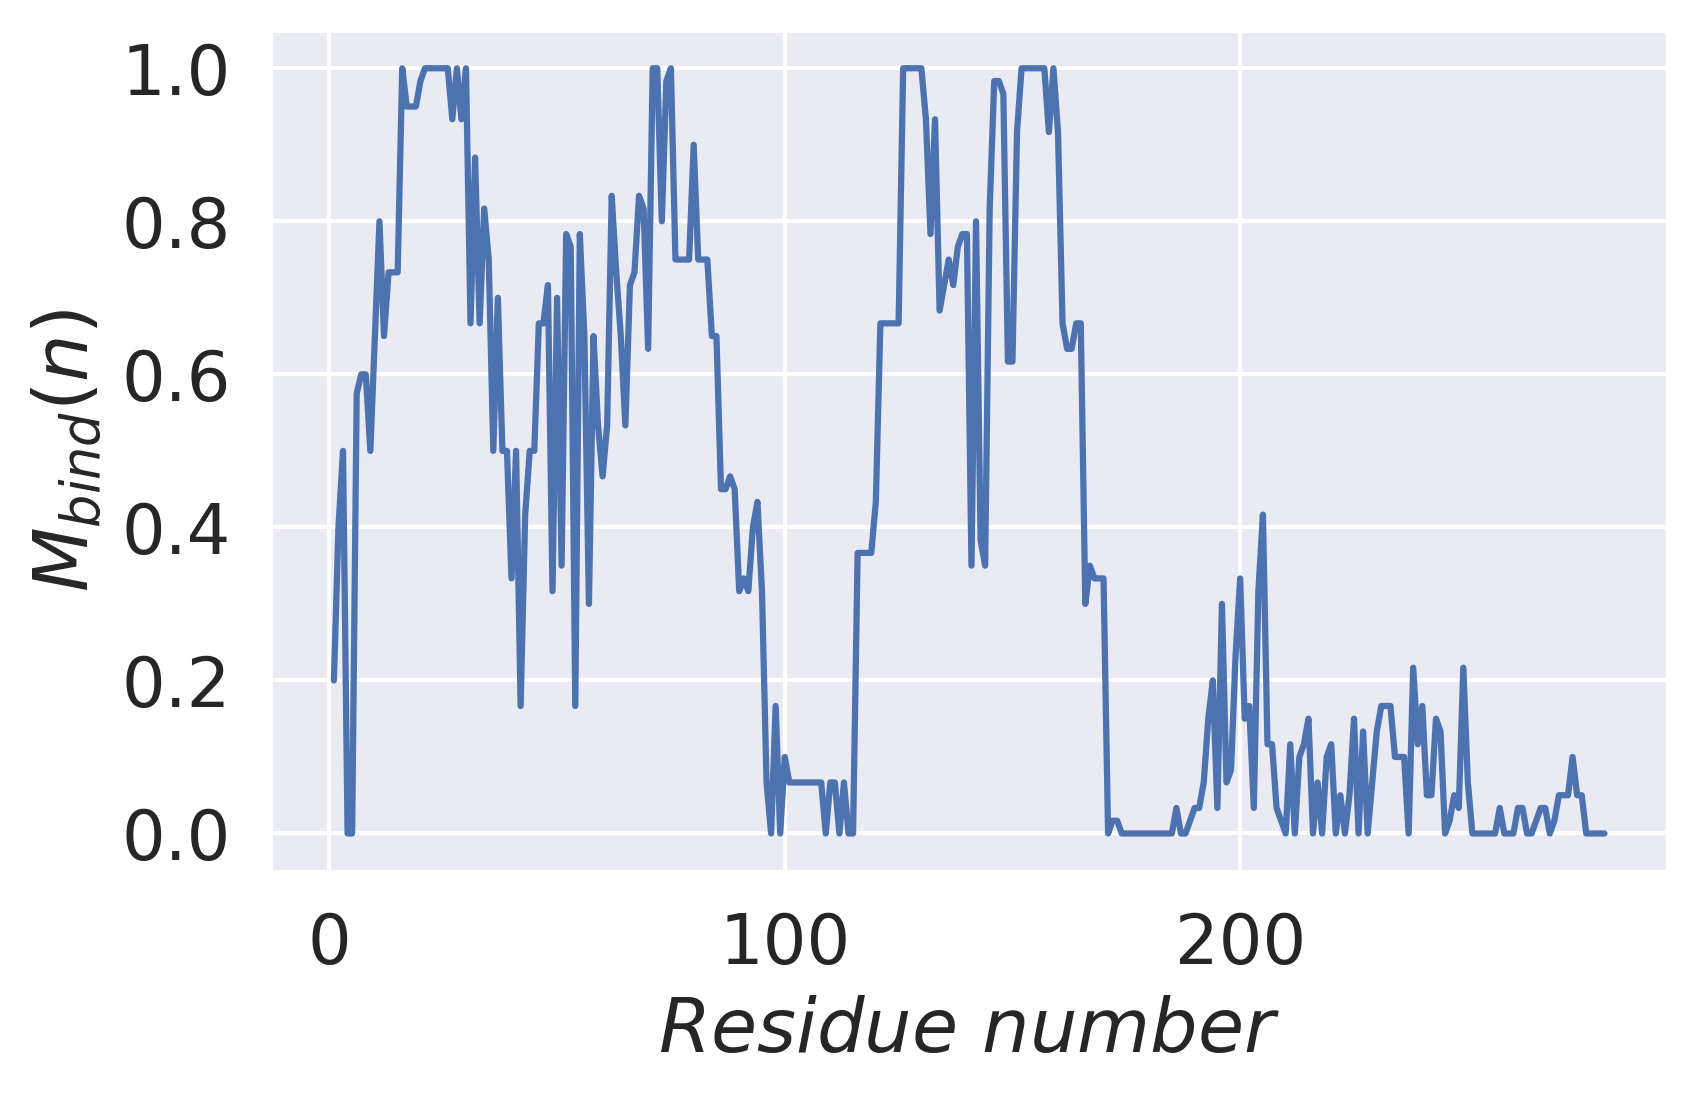

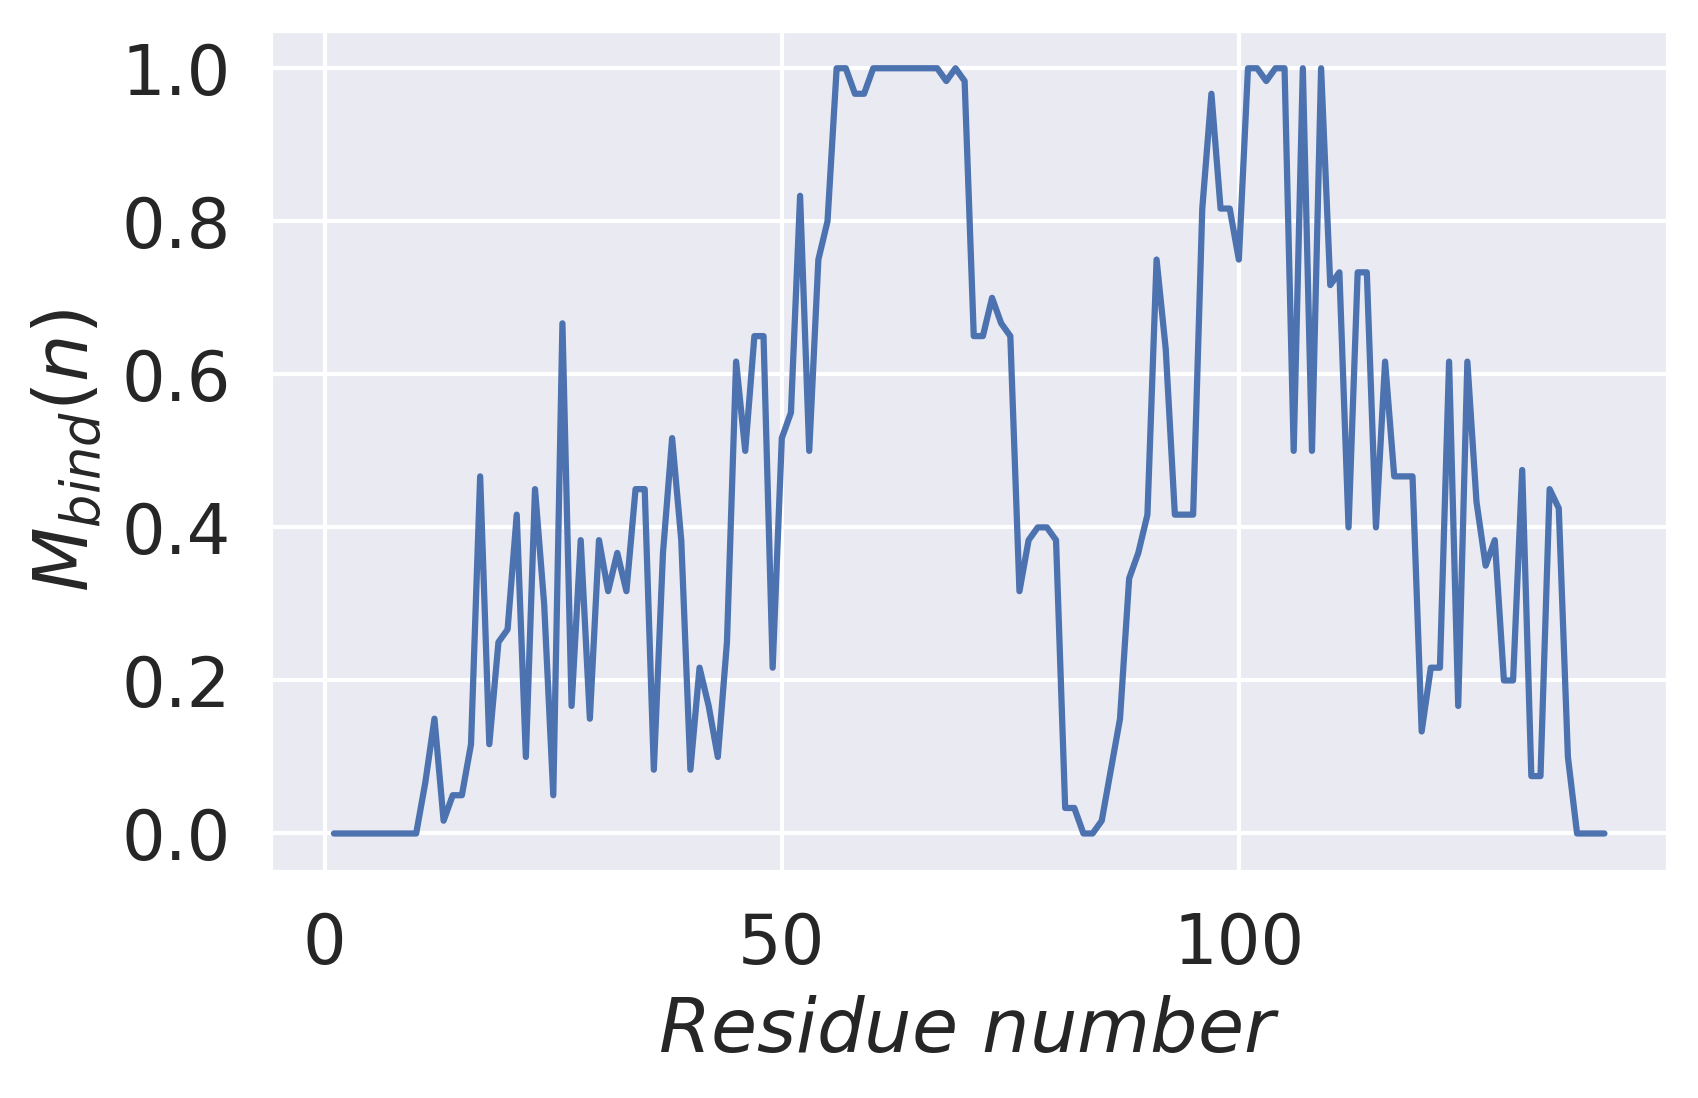

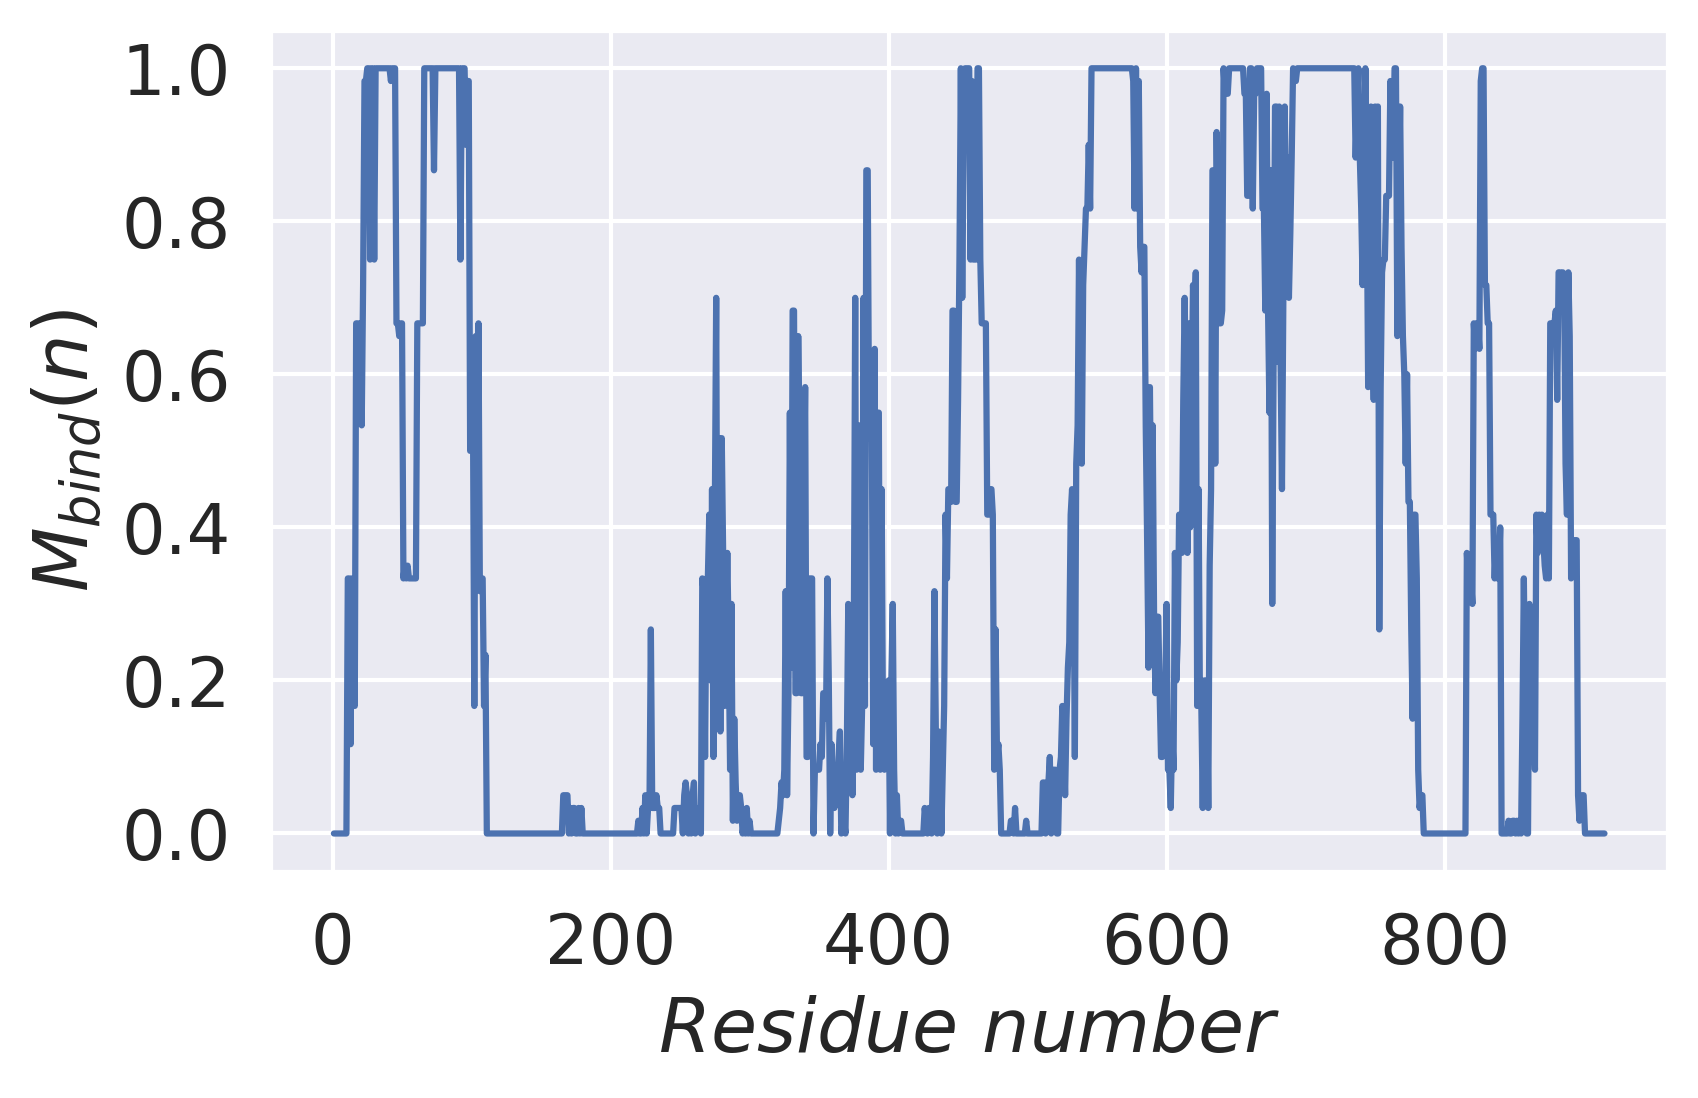

In [14]:
# Mutation analysis, where the heavy lifting is done
import matplotlib as mpl
for entry_id in entries:
    protein = get_uniprot_sequence(entry_id)
    steps=len(protein)//5
    frags=[]
    for i in range(0,steps-2):
        frags.append(protein[i*5:i*5+15])
   
    mutlst=[]
    for ix,seq in enumerate(frags):
        print(seq)
        seq_rng=list(range(1+ix*5,16+ix*5))

        for idx,letpos in enumerate(zip(seq,seq_rng)):
            letter,pos=letpos
            aaset={'A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','Y','V','W'}
            for replet in aaset:
                mutdic={}
                newseq = seq[:idx] + replet + seq[idx+1:]
                mutdic['Peptide']=newseq
                mutdic['Position']=pos
                mutdic['Replet']=replet
                mutdic['Orglet']=letter
                mutdic['Mutation']=str(letter)+str(pos)+str(replet)
                mutlst.append(mutdic)

    mutdf=pd.DataFrame(mutlst)
    
    tmutdf=mutdf['Peptide'].apply(peptrans)
    mergemutdf = pd.concat([mutdf, tmutdf], axis=1, sort=False)

    X = np.array(mergemutdf[
        [u'CA-Gly', u'Pro-MC', u'CB', u'CB-Pro',
            u'Carboxyl', u'Amide',
            u'His', u'Trp', u'Phe-Tyr', u'OH-Tyr', u'CG', u'CD', u'CE',
            u'OH', u'SH', u'S', u'NH3', u'Arg',u'MC']])

    X = sc.transform(X)
    predicted=clf.predict(X)
    mergemutdf['Binder']=predicted
    posrob=[]
    rows=[]
    for i in range(1,steps*5+1):
        row={}
        bind=len(mergemutdf[mergemutdf.Position==i][mergemutdf.Binder==True])
        nobind=len(mergemutdf[mergemutdf.Position==i][mergemutdf.Binder==False])
        rob=bind/(bind+nobind)
        posrob.append(rob)
        row['Position_fasta']=i
        row['Entry']=entry_id
        row['robbind']=rob
        row['resname_fasta']=protein[i-1]
        rows.append(row)
    posarr=np.vstack([range(1,steps*5+1),posrob])

    prdf=pd.DataFrame(rows)
    prdf.to_excel(entry_id+'_robbind.xlsx')
    

    mpl.style.use('seaborn-ticks')
    sns.set(font_scale=1.5)
    fig,ax=plt.subplots(1,tight_layout=True,dpi=300)

    ax.plot(range(1,steps*5+1),posrob)
    ax.set_xlabel(r'$Residue\ number$')
    ax.set_ylabel(r'$M_{bind}(n)$')
    plt.savefig(entry_id+'_robbind.pdf')